In [8]:
from pathlib import Path
from harmonizer.config import *
from harmonizer.diagnostics import get_series, get_yr_from_path
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
import numpy as np


DMSP_RAW = Path(DATA, "france_rawDMSP")
DMSP_OUT = Path(ROOT, "output", "gadm36_FRA_0__XGB")
FIGS_OUT = Path(ROOT, "paper","figures")

100%|██████████| 8/8 [00:00<00:00, 97.13it/s]
0it [00:00, ?it/s]
100%|██████████| 4/4 [00:00<00:00, 91.70it/s]


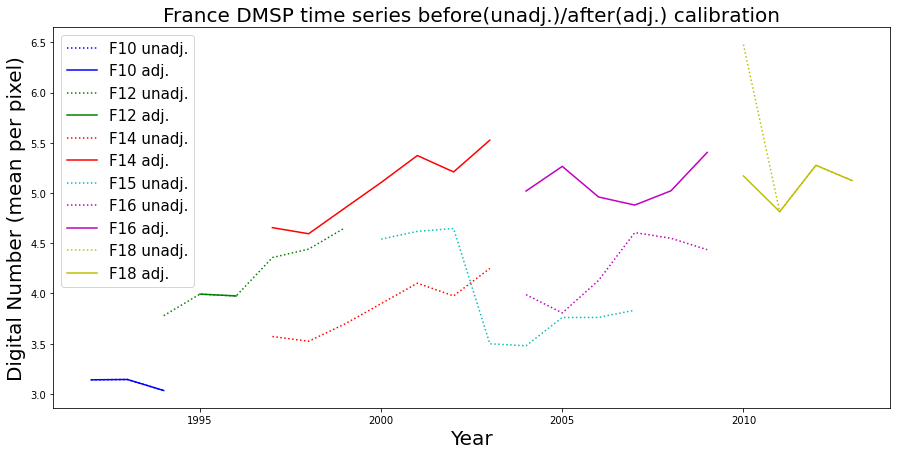

In [13]:
fig, ax = plt.subplots(1, figsize=(15, 7))
for sat, clr in zip(["F10","F12","F14","F15","F16","F18"],'bgrcmy'):
    dmsp = sorted(list(DMSP_RAW.glob(f"*{sat}*.tif")))
    dmspyrs = [get_yr_from_path(i) for i in dmsp]
    dmsp_cal = [f for f in DMSP_OUT.glob("*.tif") for d in dmsp if d.name in str(f)]
    dmspcalyrs = [get_yr_from_path(i) for i in dmsp_cal]
    dmsp = get_series(dmsp, np.nanmean, thresh=0)
    dmsp_cal = get_series(dmsp_cal, np.nanmean, thresh=0)
    sns.lineplot(x=dmspyrs, y=dmsp, color=clr, ls=":", label=f"{sat} unadj.", ax=ax)
    sns.lineplot(x=dmspcalyrs, y=dmsp_cal, color=clr, label=f"{sat} adj.", ax=ax)
plt.legend(fontsize=15)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Digital Number (mean per pixel)", fontsize=20)
plt.title("France DMSP time series before(unadj.)/after(adj.) calibration", fontsize=20);
plt.savefig(Path(FIGS_OUT,"DMSPcalib.png"))
#     dmspraw = get_series(dmsp, np.nanmean, thresh=1)
#     dmspcal = get_series(dmsp_cal, np.nanmean, thresh=1)